# Heart Disease classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import os

# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# import category encoders
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

### Load Dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [3]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Get Dataset details

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [6]:
# view the categorical variables

data[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


### Cleaning Data

In [7]:
# replace '?' values in Sex variable with `NaN`
data['Sex'].replace('?', np.NaN, inplace=True)

In [8]:
data['ChestPainType'].replace('?', np.NaN, inplace=True)

In [9]:
data['RestingECG'].replace('?', np.NaN, inplace=True)

In [10]:
data['ExerciseAngina'].replace('?', np.NaN, inplace=True)

In [11]:
data['ST_Slope'].replace('?', np.NaN, inplace=True)

### Cheack if there's Null data

In [12]:
data[categorical].isnull().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [13]:
X = data.drop(['HeartDisease'], axis=1)

y = data['HeartDisease']

### Split Data to Train and Test for X & Y

In [14]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((642, 11), (276, 11))

In [16]:
# check data types in X_train
X_train.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object

In [17]:
X_train[categorical].isnull().mean()

Sex              0.00
ChestPainType    0.00
RestingECG       0.00
ExerciseAngina   0.00
ST_Slope         0.00
dtype: float64

In [18]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,Age,Sex_1,Sex_2,ChestPainType_1,ChestPainType_2,ChestPainType_3,ChestPainType_4,RestingBP,Cholesterol,FastingBS,RestingECG_1,RestingECG_2,RestingECG_3,MaxHR,ExerciseAngina_1,ExerciseAngina_2,Oldpeak,ST_Slope_1,ST_Slope_2,ST_Slope_3
76,32,1,0,1,0,0,0,118,529,0,1,0,0,130,1,0,0.00,1,0,0
48,36,1,0,0,1,0,0,112,340,0,1,0,0,184,1,0,1.00,1,0,0
304,51,1,0,1,0,0,0,95,0,1,1,0,0,126,1,0,2.20,1,0,0
263,59,1,0,1,0,0,0,130,126,0,1,0,0,125,1,0,0.00,1,0,0
744,60,1,0,1,0,0,0,117,230,1,1,0,0,160,0,1,1.40,0,1,0


In [20]:
X_test.head()

,Age,Sex_1,Sex_2,ChestPainType_1,ChestPainType_2,ChestPainType_3,ChestPainType_4,RestingBP,Cholesterol,FastingBS,RestingECG_1,RestingECG_2,RestingECG_3,MaxHR,ExerciseAngina_1,ExerciseAngina_2,Oldpeak,ST_Slope_1,ST_Slope_2,ST_Slope_3
306,55,1,0,1,0,0,0,115,0,1,1,0,0,155,1,0,0.10,1,0,0
711,66,1,0,1,0,0,0,120,302,0,0,1,0,151,1,0,0.40,1,0,0
298,51,1,0,1,0,0,0,110,0,1,1,0,0,92,1,0,0.00,1,0,0
466,55,1,0,0,1,0,0,120,0,0,0,0,1,125,0,1,2.50,1,0,0
253,62,1,0,0,0,1,0,140,271,0,1,0,0,152,1,0,1.00,0,1,0


In [21]:
cols = X_train.columns

### Data scaling 

In [22]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Laod Train, Test data

In [23]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [24]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [25]:
X_train.head()

,Age,Sex_1,Sex_2,ChestPainType_1,ChestPainType_2,ChestPainType_3,ChestPainType_4,RestingBP,Cholesterol,FastingBS,RestingECG_1,RestingECG_2,RestingECG_3,MaxHR,ExerciseAngina_1,ExerciseAngina_2,Oldpeak,ST_Slope_1,ST_Slope_2,ST_Slope_3
0,-1.69,0.00,0.00,0.00,0.00,0.00,0.00,-0.60,3.44,0.00,0.00,0.00,0.00,-0.21,0.00,0.00,-0.40,1.00,0.00,0.00
1,-1.38,0.00,0.00,-1.00,1.00,0.00,0.00,-0.90,1.31,0.00,0.00,0.00,0.00,1.22,0.00,0.00,0.27,1.00,0.00,0.00
2,-0.23,0.00,0.00,0.00,0.00,0.00,0.00,-1.75,-2.51,1.00,0.00,0.00,0.00,-0.32,0.00,0.00,1.07,1.00,0.00,0.00
3,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.09,0.00,0.00,0.00,0.00,-0.34,0.00,0.00,-0.40,1.00,0.00,0.00
4,0.46,0.00,0.00,0.00,0.00,0.00,0.00,-0.65,0.08,1.00,0.00,0.00,0.00,0.58,-1.00,1.00,0.53,0.00,1.00,0.00


### Naive Bayes 

In [26]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

### Test the trained models and report the accuracy, precision, confusion_matrix, recall, and F1 score for Naive Bayes.

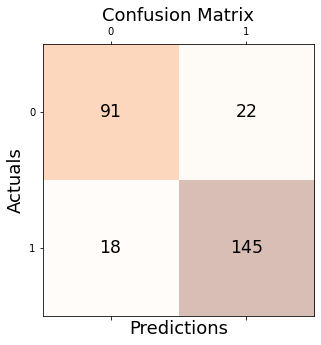

Precision: 0.868
Recall: 0.890
F1 Score: 0.879
Model accuracy score: 0.8551


In [28]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### SVM


In [29]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score



### Test the trained models and report the accuracy, precision, confusion_matrix, recall, and F1 score for SVM

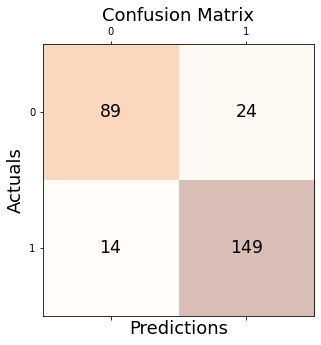

Precision: 0.861
Recall: 0.914
F1 Score: 0.887
Model accuracy: 0.8623


In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))